<a href="https://colab.research.google.com/github/AlanGranea/Challenge-Alura-Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [119]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



El ingreso de la tienda 1 es de 1,150,880,400.00 dolares
El ingreso de la tienda 2 es de 1,116,343,500.00 dolares
El ingreso de la tienda 3 es de 1,098,019,600.00 dolares
El ingreso de la tienda 4 es de 1,038,375,700.00 dolares


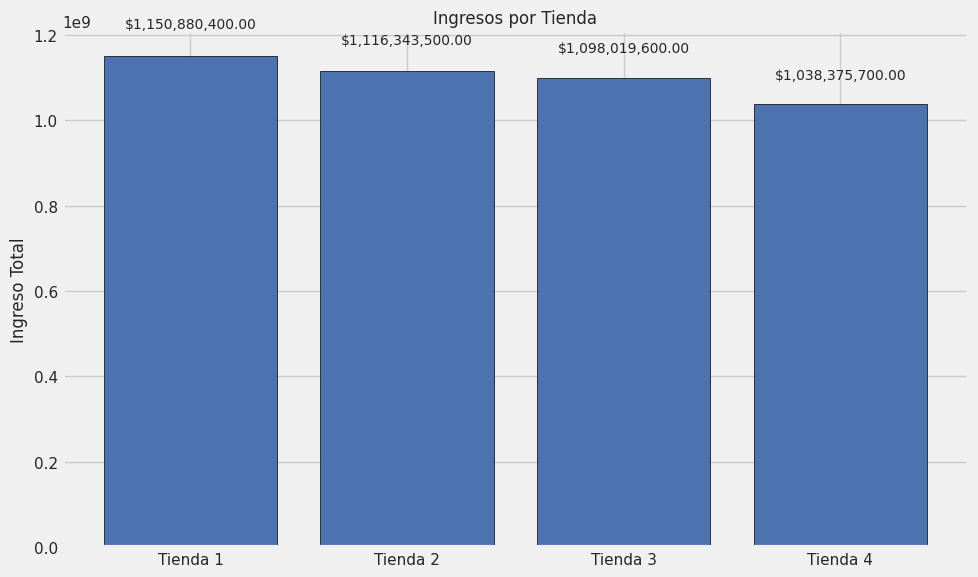

In [120]:
import matplotlib.pyplot as plt

ingreso1 = tienda["Precio"].sum()
ingreso2 = tienda2["Precio"].sum()
ingreso3 = tienda3["Precio"].sum()
ingreso4 = tienda4["Precio"].sum()

print(f'El ingreso de la tienda 1 es de {ingreso1:,.2f} dolares')
print(f'El ingreso de la tienda 2 es de {ingreso2:,.2f} dolares')
print(f'El ingreso de la tienda 3 es de {ingreso3:,.2f} dolares')
print(f'El ingreso de la tienda 4 es de {ingreso4:,.2f} dolares')

ingresos = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Total": [ingreso1, ingreso2, ingreso3, ingreso4]
})

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(10, 6))
barras = ax.bar(ingresos["Tienda"], ingresos["Total"], color="#4C72B0", edgecolor='black')

for barra in barras:
    valor = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, valor + 0.05 * valor, f"${valor:,.2f}",
            ha='center', va='bottom', fontsize=10)

ax.set_ylabel("Ingreso Total", fontsize=12)
ax.set_title("Ingresos por Tienda", fontsize=12)

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

Estas son las ventas por categoría de la tienda 1:
 Categoría del Producto  Cantidad
Artículos para el hogar       171
                 Libros       173
 Instrumentos musicales       182
   Deportes y diversión       284
      Electrodomésticos       312
               Juguetes       324
           Electrónicos       448
                Muebles       465

Estas son las ventas por categoría de la tienda 2:
 Categoría del Producto  Cantidad
Artículos para el hogar       181
                 Libros       197
 Instrumentos musicales       224
   Deportes y diversión       275
      Electrodomésticos       305
               Juguetes       313
           Electrónicos       422
                Muebles       442

Estas son las ventas por categoría de la tienda 3:
 Categoría del Producto  Cantidad
Artículos para el hogar       177
 Instrumentos musicales       177
                 Libros       185
   Deportes y diversión       277
      Electrodomésticos       278
               Juguetes      

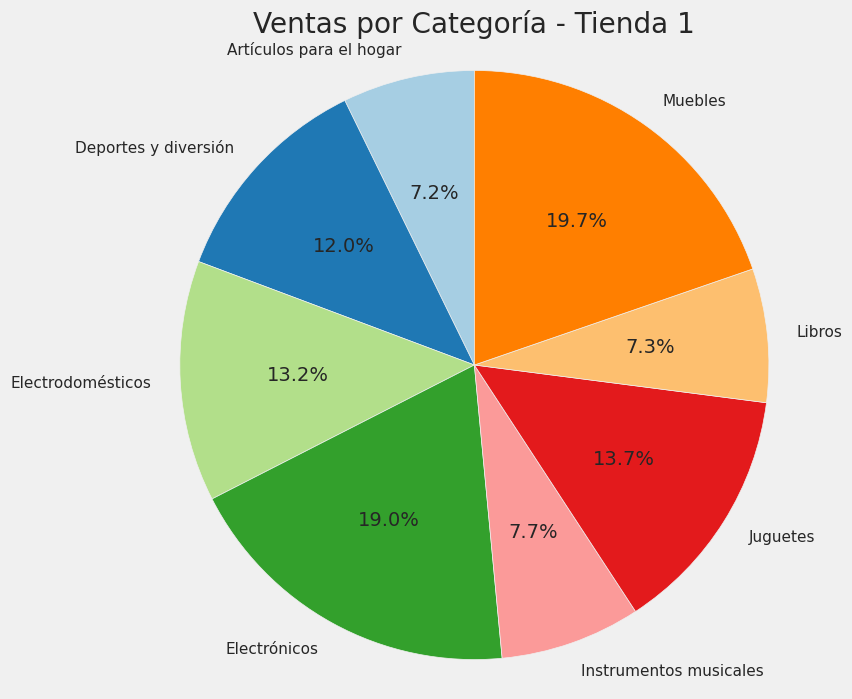

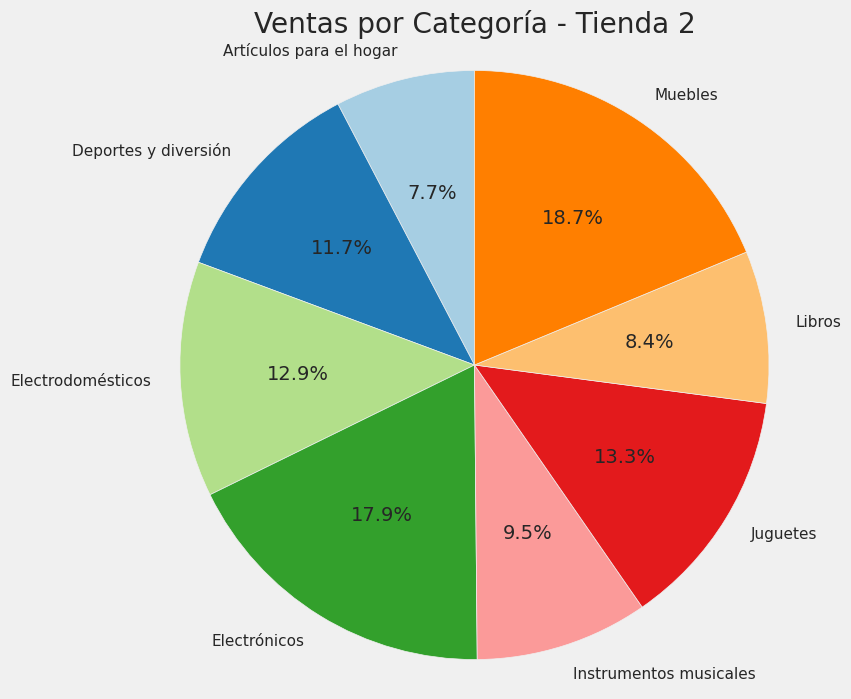

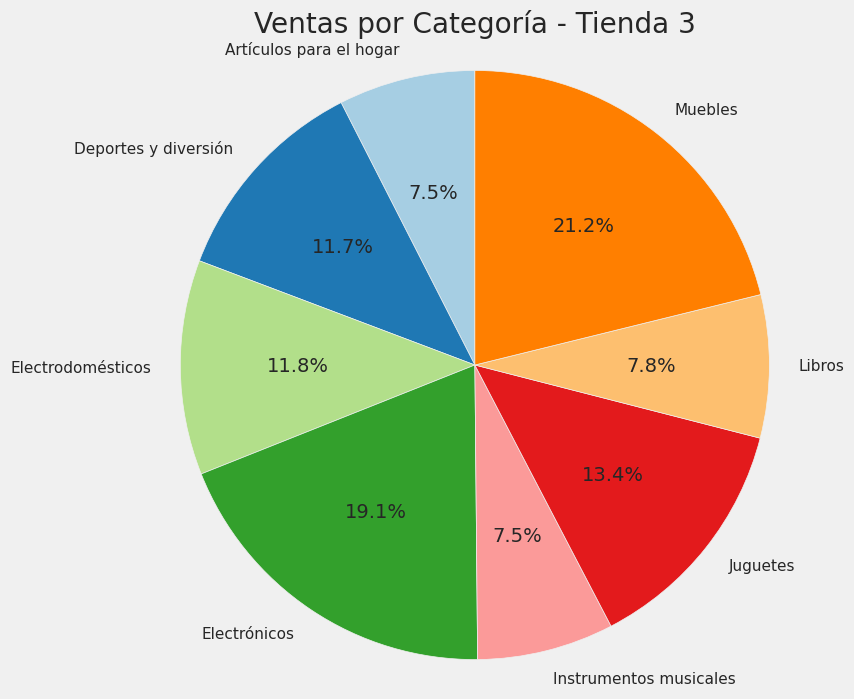

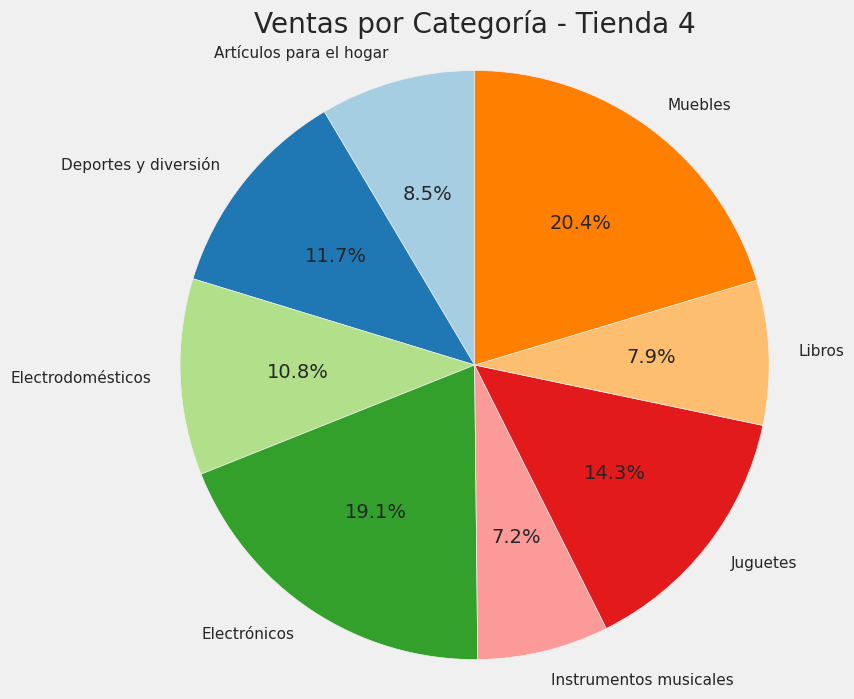

In [121]:
ventas_tienda_1 = tienda.groupby("Categoría del Producto").size().reset_index(name="Cantidad")
ventas_tienda_2 = tienda2.groupby("Categoría del Producto").size().reset_index(name="Cantidad")
ventas_tienda_3 = tienda3.groupby("Categoría del Producto").size().reset_index(name="Cantidad")
ventas_tienda_4 = tienda4.groupby("Categoría del Producto").size().reset_index(name="Cantidad")

print("Estas son las ventas por categoría de la tienda 1:")
print(ventas_tienda_1.sort_values(by="Cantidad").to_string(index=False))

print("\nEstas son las ventas por categoría de la tienda 2:")
print(ventas_tienda_2.sort_values(by="Cantidad").to_string(index=False))

print("\nEstas son las ventas por categoría de la tienda 3:")
print(ventas_tienda_3.sort_values(by="Cantidad").to_string(index=False))

print("\nEstas son las ventas por categoría de la tienda 4:")
print(ventas_tienda_4.sort_values(by="Cantidad").to_string(index=False))


import matplotlib.pyplot as plt

# Tienda 1
plt.figure(figsize=(8, 8))
plt.pie(ventas_tienda_1["Cantidad"], labels=ventas_tienda_1["Categoría del Producto"], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Ventas por Categoría - Tienda 1")
plt.axis('equal')
plt.show()

# Tienda 2
plt.figure(figsize=(8, 8))
plt.pie(ventas_tienda_2["Cantidad"], labels=ventas_tienda_2["Categoría del Producto"], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Ventas por Categoría - Tienda 2")
plt.axis('equal')
plt.show()

# Tienda 3
plt.figure(figsize=(8, 8))
plt.pie(ventas_tienda_3["Cantidad"], labels=ventas_tienda_3["Categoría del Producto"], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Ventas por Categoría - Tienda 3")
plt.axis('equal')
plt.show()

# Tienda 4
plt.figure(figsize=(8, 8))
plt.pie(ventas_tienda_4["Cantidad"], labels=ventas_tienda_4["Categoría del Producto"], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Ventas por Categoría - Tienda 4")
plt.axis('equal')
plt.show()

# 3. Calificación promedio de la tienda


In [122]:
promedio_tienda1 = tienda["Calificación"].mean()
promedio_tienda2 = tienda2["Calificación"].mean()
promedio_tienda3 = tienda3["Calificación"].mean()
promedio_tienda4 = tienda4["Calificación"].mean()

print(f'La calificación promedio de la tienda 1 es de {promedio_tienda1:.2f} estrellas')
print(f'La calificación promedio de la tienda 2 es de {promedio_tienda2:.2f} estrellas')
print(f'La calificación promedio de la tienda 3 es de {promedio_tienda3:.2f} estrellas')
print(f'La calificación promedio de la tienda 4 es de {promedio_tienda4:.2f} estrellas')

La calificación promedio de la tienda 1 es de 3.98 estrellas
La calificación promedio de la tienda 2 es de 4.04 estrellas
La calificación promedio de la tienda 3 es de 4.05 estrellas
La calificación promedio de la tienda 4 es de 4.00 estrellas


# 4. Productos más y menos vendidos


Los productos más vendidos de Tienda 1 son:
Producto: Microondas - Vendidos: 60
Producto: TV LED UHD 4K - Vendidos: 60
Producto: Armario - Vendidos: 60
Producto: Secadora de ropa - Vendidos: 58
Producto: Mesa de noche - Vendidos: 56

Los productos menos vendidos de Tienda 1 son:
Producto: Ciencia de datos con Python - Vendidos: 39
Producto: Pandereta - Vendidos: 36
Producto: Olla de presión - Vendidos: 35
Producto: Auriculares con micrófono - Vendidos: 33
Producto: Celular ABXY - Vendidos: 33

Los productos más vendidos de Tienda 2 son:
Producto: Iniciando en programación - Vendidos: 65
Producto: Microondas - Vendidos: 62
Producto: Batería - Vendidos: 61
Producto: Guitarra acústica - Vendidos: 58
Producto: Pandereta - Vendidos: 58

Los productos menos vendidos de Tienda 2 son:
Producto: Auriculares - Vendidos: 37
Producto: Sillón - Vendidos: 35
Producto: Mesa de comedor - Vendidos: 34
Producto: Impresora - Vendidos: 34
Producto: Juego de mesa - Vendidos: 32

Los productos más vendidos

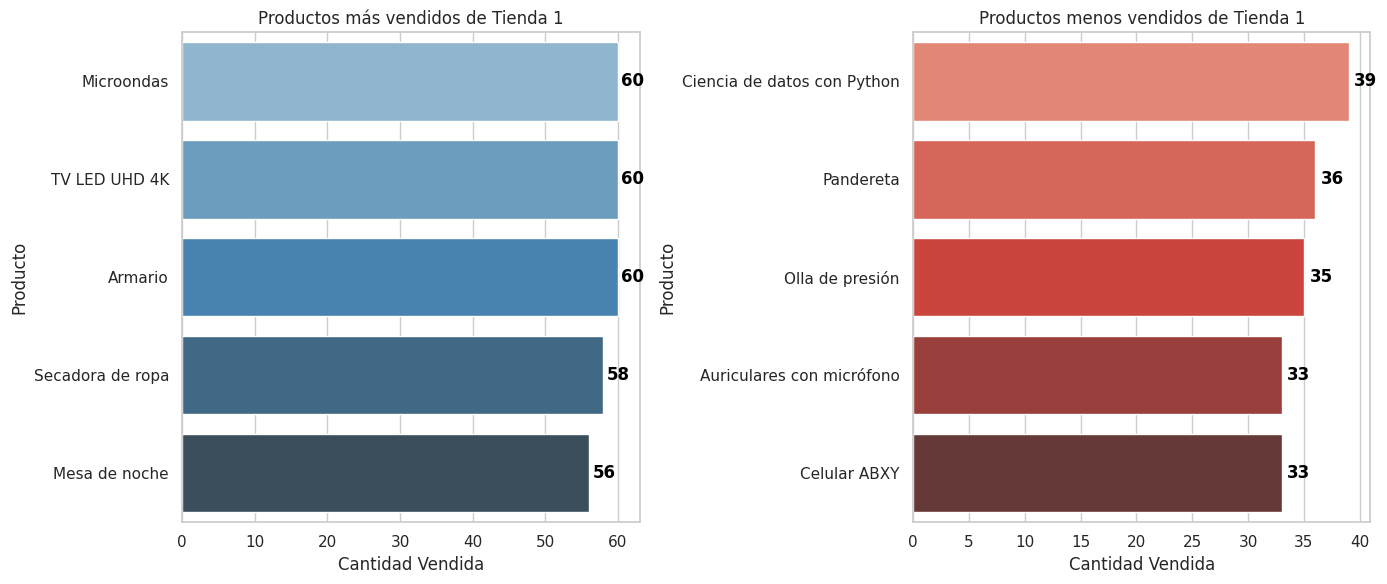

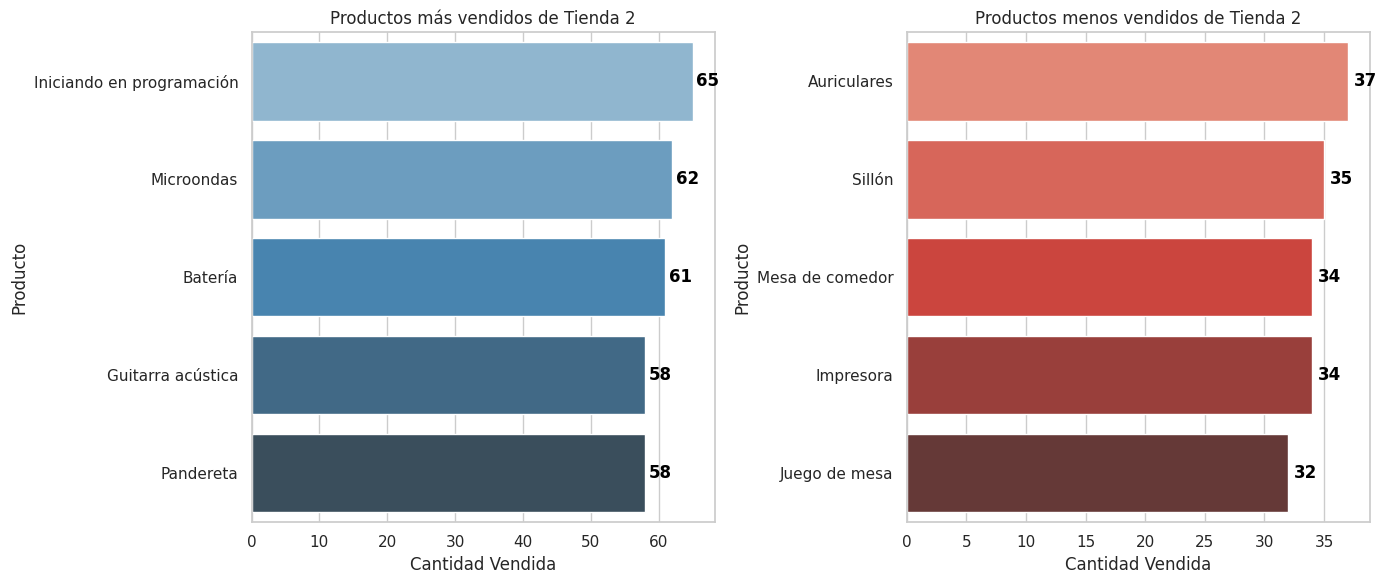

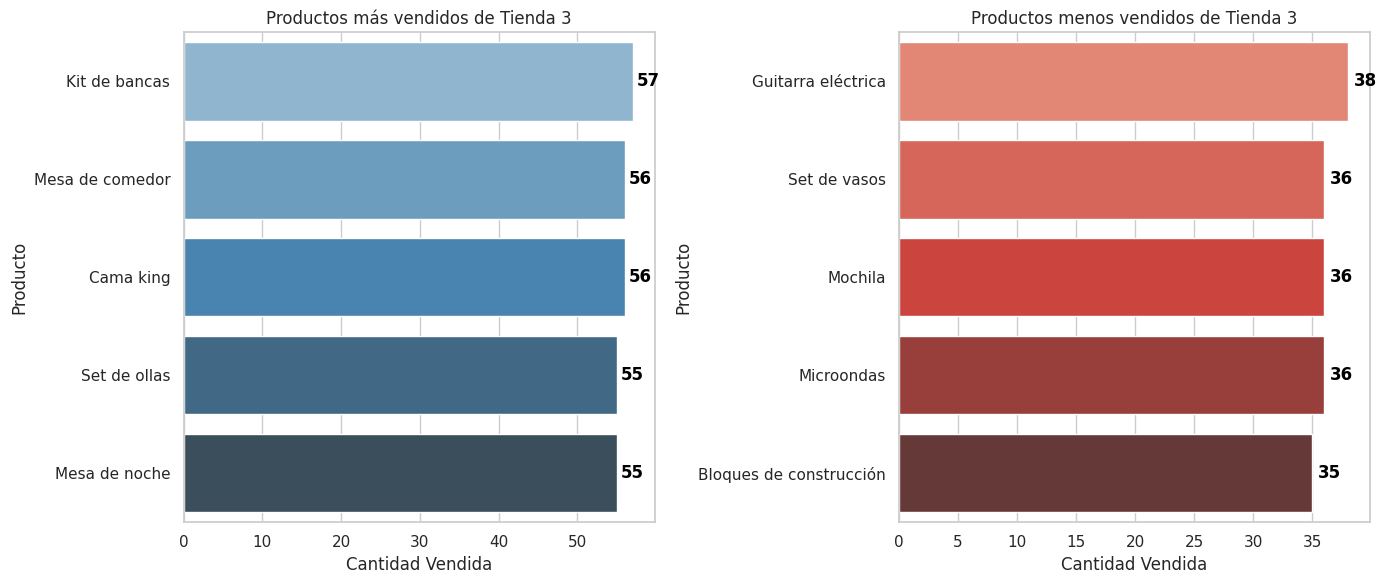

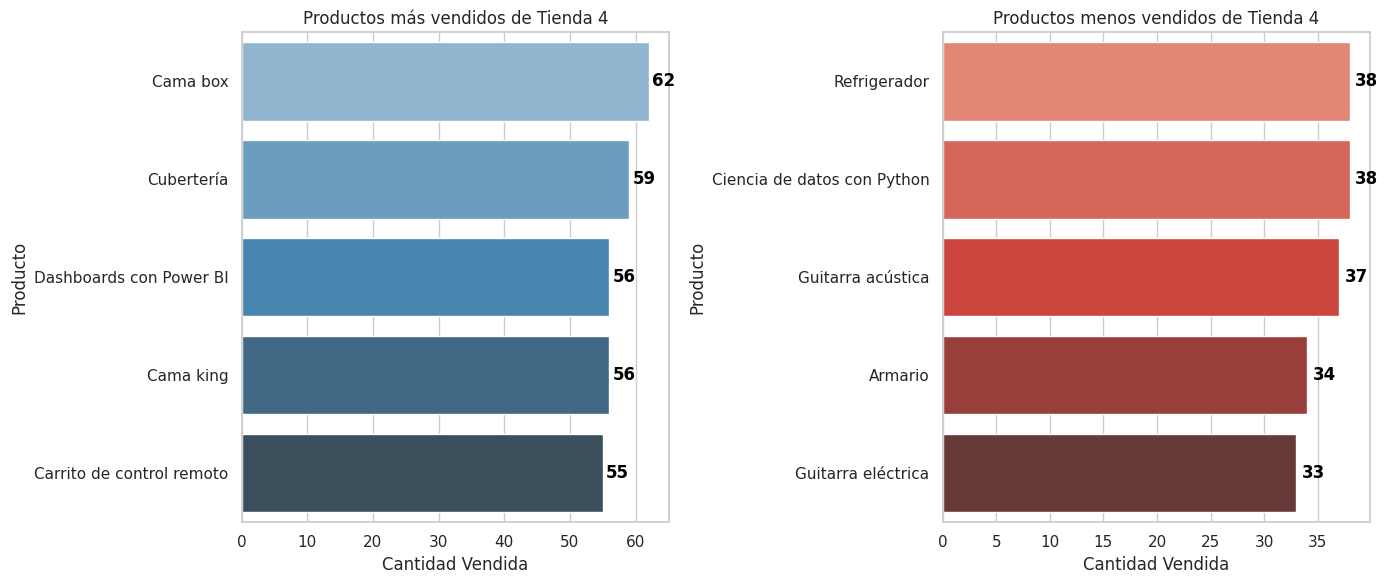

In [123]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

productos_top = {}
productos_fondo = {}

for nombre_tienda, df in tiendas.items():
    df['Producto'] = df['Producto'].str.strip()

    top = df['Producto'].value_counts().head(5)
    fondo = df['Producto'].value_counts().tail(5)

    productos_top[nombre_tienda] = top
    productos_fondo[nombre_tienda] = fondo

    print(f"\nLos productos más vendidos de {nombre_tienda} son:")
    for producto, cantidad in top.items():
      print(f"Producto: {producto} - Vendidos: {cantidad}")

    print(f"\nLos productos menos vendidos de {nombre_tienda} son:")
    for producto, cantidad in fondo.items():
      print(f"Producto: {producto} - Vendidos: {cantidad}")

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

for nombre_tienda, df in tiendas.items():
    df['Producto'] = df['Producto'].str.strip()
    top = df['Producto'].value_counts().head(5)
    fondo = df['Producto'].value_counts().tail(5)

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.barplot(x=top.values, y=top.index, ax=axes[0], hue=top.index, palette="Blues_d", legend=False)
    axes[0].set_title(f"Productos más vendidos de {nombre_tienda}")
    axes[0].set_xlabel('Cantidad Vendida')
    axes[0].set_ylabel('Producto')

    for i, v in enumerate(top.values):
        axes[0].text(v + 0.5, i, str(v), va='center', ha='left', color='black', fontweight='bold')

    sns.barplot(x=fondo.values, y=fondo.index, ax=axes[1], hue=fondo.index, palette="Reds_d", legend=False)
    axes[1].set_title(f"Productos menos vendidos de {nombre_tienda}")
    axes[1].set_xlabel('Cantidad Vendida')
    axes[1].set_ylabel('Producto')

    for i, v in enumerate(fondo.values):
        axes[1].text(v + 0.5, i, str(v), va='center', ha='left', color='black', fontweight='bold')

    plt.tight_layout()

    plt.show()

# 5. Envío promedio por tienda

In [124]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

costos_promedio_envio = {}
for nombre_tienda, df in tiendas.items():
    df['Costo de envío'] = pd.to_numeric(df['Costo de envío'], errors='coerce').fillna(0)
    costo_promedio = df['Costo de envío'].mean()
    costos_promedio_envio[nombre_tienda] = costo_promedio
    print(f"El costo promedio de envío de la {nombre_tienda} es de {costo_promedio:.2f} dólares")

print('\n')

gasto_total_envio = {}
for nombre_tienda, df in tiendas.items():
    if 'Costo de envío' in df.columns:
        df['Costo de envío'] = pd.to_numeric(df['Costo de envío'], errors='coerce').fillna(0)
        gasto_total = df['Costo de envío'].sum()
        gasto_total_envio[nombre_tienda] = gasto_total
        print(f"El gasto total de envío en la {nombre_tienda} es de {gasto_total:.2f} dólares")

El costo promedio de envío de la Tienda 1 es de 26018.61 dólares
El costo promedio de envío de la Tienda 2 es de 25216.24 dólares
El costo promedio de envío de la Tienda 3 es de 24805.68 dólares
El costo promedio de envío de la Tienda 4 es de 23459.46 dólares


El gasto total de envío en la Tienda 1 es de 61377900.00 dólares
El gasto total de envío en la Tienda 2 es de 59485100.00 dólares
El gasto total de envío en la Tienda 3 es de 58516600.00 dólares
El gasto total de envío en la Tienda 4 es de 55317400.00 dólares


# 6. Análisis del desempeño geográfico


In [125]:
!pip install contextily

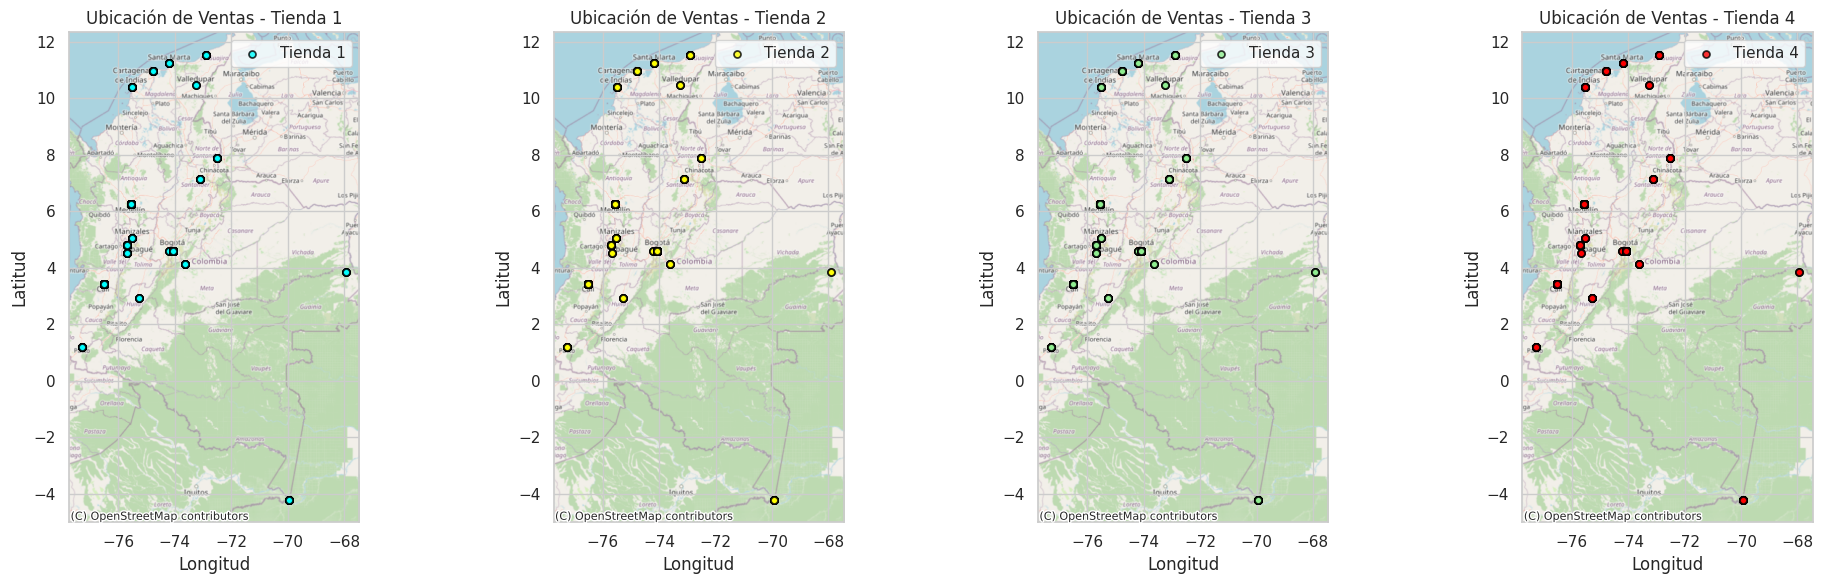

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas

tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])
geometry = geopandas.points_from_xy(tiendas['lon'], tiendas['lat'])
tiendas_geo = geopandas.GeoDataFrame(tiendas, geometry=geometry, crs="EPSG:4326")

try:
    colombia = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    colombia = colombia[colombia['name'] == 'Colombia']
    colombia = colombia.to_crs("EPSG:4326")
except:
    colombia = None
    mapa_cargado = False

fig, axes = plt.subplots(1, 4, figsize=(20, 6))

for idx, (nombre_tienda, color) in enumerate([('Tienda 1', 'cyan'), ('Tienda 2', 'yellow'), ('Tienda 3', '#90EE90'), ('Tienda 4', 'red')]):
    ax = axes[idx]

    if colombia is not None:
        colombia.plot(ax=ax, color='lightgray', alpha=0.7)

    data_tienda = tiendas_geo[tiendas_geo['Tienda'] == nombre_tienda]
    data_tienda.plot(ax=ax,
                     color=color,
                     marker='o',
                     label=nombre_tienda,
                     alpha=0.8,
                     markersize=25,
                     edgecolor='black',
                     linewidth=1.25)

    ax.set_title(f'Ubicación de Ventas - {nombre_tienda}')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')
    ax.legend()
    ax.grid(True)

    try:
        import contextily as ctx
        ctx.add_basemap(ax, crs=data_tienda.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
    except ImportError:
        print("contextily no está instalado, el mapa base no se mostrará. Instálalo con: pip install contextily")

plt.tight_layout()
plt.show()